In [1]:
import pandas as pd
import plotly.graph_objs as go

In [2]:
df = pd.read_csv("https://raw.git.generalassemb.ly/intuit-ds-15/05-cleaning-combining-data/master/data/drinks.csv?token=AAAK2H43E5OWLGL6F7TI2OLC7RDXQ", keep_default_na=False)

In [3]:
pd.unique(df['continent'])

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [8]:
df.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
183,Tanzania,36,6,1,5.7,AF
184,USA,249,158,84,8.7,NA
185,Uruguay,115,35,220,6.6,SA
186,Uzbekistan,25,101,8,2.4,AS
187,Vanuatu,21,18,11,0.9,OC
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [9]:
df['continent_name'] = df['continent'].map({ 'NA':'North America', 'SA':'South America', 'EU':'Europe', 'AF':'Africa', 'OC': 'Oceania', 'AS': 'Asia' })
pd.unique(df['continent_name'])

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [63]:
# Grouping by continent name
grouped_mean=df.groupby(['continent_name']).mean()
results=pd.DataFrame(grouped_mean)
results

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent_name,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [66]:
# Getting X and Y values per continent

continent='South America'
xData = results.loc[continent].index
yData = results.loc[continent]

print(xData, yData)

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object') beer_servings                   175.083333
spirit_servings                 114.750000
wine_servings                    62.416667
total_litres_of_pure_alcohol      6.308333
Name: South America, dtype: float64


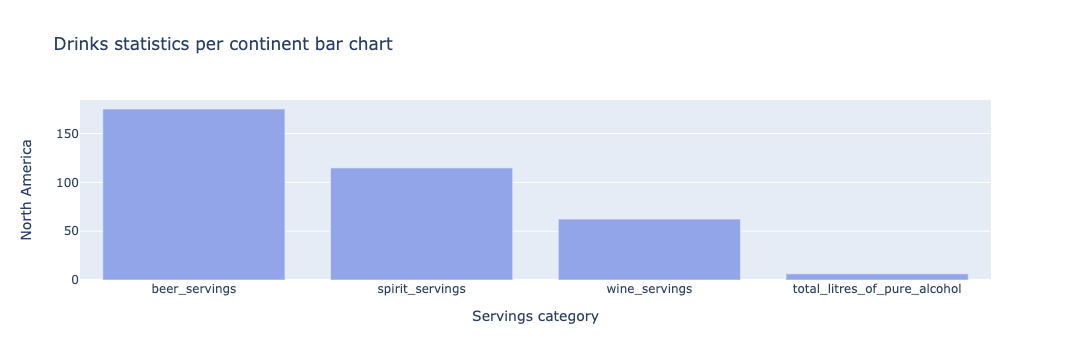

In [68]:
color1='#92A5E8'
color2='#8E44AD'
color3='#FFC300'

# Create a stats by continent bar chart
mydata1 = go.Bar(
    x=xData,
    y=yData,
    marker=dict(color=color1)
)
mylayout = go.Layout(
    title='Drinks statistics per continent bar chart',
    xaxis = dict(title = 'Servings category'), # x-axis label
    yaxis = dict(title = str(continuous_var)), # y-axis label

)
fig = go.Figure(data=[mydata1], layout=mylayout)
fig

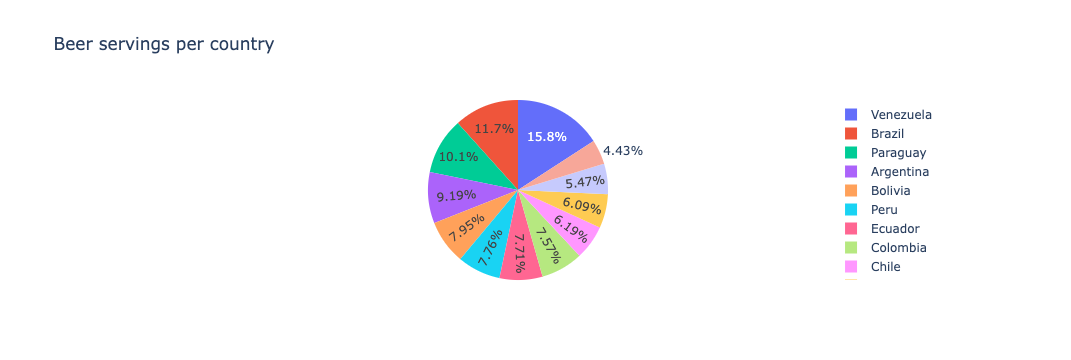

In [72]:

# Creating beer servings per country pie chart
mydata2 = go.Pie(
    labels=df.loc[df['continent_name'] == continent]['country'],
    values=df.loc[df['continent_name'] == continent]['beer_servings']
)

mylayout = go.Layout(
    title='Beer servings per country',
    xaxis = dict(title = 'Servings category'), # x-axis label
    yaxis = dict(title = str(continuous_var)), # y-axis label

)
fig = go.Figure(data=[mydata2], layout=mylayout)
fig